# 01 신경망의 개요

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/knou_deep_learning/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

코드 1-1 [1] 필요한 패키지 불러오기

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

코드 1-1 [2] 데이터 준비 함수 정의하기

In [2]:
def prepare_data(target):
    iris = load_iris()          # iris data set 읽기
    X_tr = iris.data[:, 2:]     # 4개의 특징 중 꽃잎의 길이와 폭 선택
    labels = iris.target_names  # 'setosa', 'versicolor', 'vriginica'
    y = iris.target

    # 학습표본의 레이블 지정 - target에 지정된 레이블이면 1, 그 외는 0
    target_lable = np.where(labels == target)[0]
    y_tr = (y == target_lable).astype(int)
    return X_tr, y_tr, ['(1) '+target, '(0) the others']

코드 1-1 [3] 활성화 함수 - 단위 계단 함수

In [3]:
def step(x):
    return np.heaviside(x, 1)

코드 1-1 [4] 퍼셉트론 클래스 선언

In [4]:
class Perceptron:
    def __init__(self, dim, activation):
        rnd = np.random.default_rng()
        self.dim = dim
        self.activation = activation
        # 가중치(w)와 바이어스(b)를 He normal 방식으로 초기화
        self.w = rnd.normal(scale=np.sqrt(2.0 / dim), size=dim)
        self.b = rnd.normal(scale=np.sqrt(2.0 / dim))

    def print_w(self):
        for i in range(self.dim):
            print('  w{} = {:6.3f}'.format(i+1, self.w[i]), end='')
        print('  b = {:6.3f}'.format(self.b))

    def predict(self, x) : # numpy 배열 x에 저장된 표본의 출력 계산
        return self.activation(np.dot(x, self.w) + self.b)

    def fit(self, X, y, N, epochs, eta=0.01):
        # 학습표본의 인덱스를 무작위 순서로 섞음
        random_idx = np.random.permutation(N)
        X = X[random_idx]
        y = y[random_idx]
        print('w의 초깃값 ', end='')
        self.print_w()
        for j in range(epochs):
            for i in range(N):
                # x[1]에 대한 출력 오차 계산
                delta = self.predict(X[i]) - y[i]
                self.w -= eta * delta * X[i]
                self.b -= eta * delta
            # 학습 과정 출력
            loss = self.predict(X) - y
            loss = (loss * loss).sum() / N
            print('에포크 = {:4d}    손실 = {:8.5f}'.format(j+1, loss), end='')
            self.print_w()
            if loss < 1e-5:
                break

코드 1-1 [5] 모델 시각화

In [5]:
def visualize(net, X, y, multi_class, labels, class_id, colors,
              xlabel, ylabel, legend_loc='lower right'):
    # 데이터의 최소~최대 범위를 일정 간격의 좌표값으로 나열
    x1_max = np.max(X[:, 0]) + 0.5
    x1_min = np.min(X[:, 0]) - 0.5
    x2_max = np.max(X[:, 1]) + 0.5
    x2_min = np.min(X[:, 1]) - 0.5
    x1_lin = np.linspace(x1_min, x1_max, 200)
    x2_lin = np.linspace(x2_min, x2_max, 200)

    # x1_lin과 x2_lin의 격자 좌표 값 구하기
    x1_mesh, x2_mesh = np.meshgrid(x1_lin, x2_lin)

    # (x1, x2) 좌표의 배열로 만들어 신경망의 입력 구성
    X_test = np.column_stack([x1_mesh.ravel(), x2_mesh.ravel()])

    # 학습된 신경망으로 X_test에 대한 출력 계산
    if multi_class:
        y_hat = np.argmax(net.predict(X_test), axis=1)
    else:
        y_hat = (net.predict(X_test) >= 0.5).astype(int)

    # 출력할 그래프의 수평/수직 범위 및 각 클래스에 대한 색상 및 범례 설정
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)

    # 클래스별로 산점도 그리기
    for c, i, c_name in zip (colors, labels, class_id):
        # 격자 좌표의 클래스별 산점도
        plt.scatter(X_test[y_hat == i, 0], X_test[y_hat == i, 1],
                    c=c, s=5, alpha=0.1, edgecolors='none')
        # 학습 표본의 클래스별 산점도
        plt.scatter(X[y==i, 0], X[y==i, 1],
                    c=c, s=20, label=c_name)
    # 범례의 표시 위치 지정
    plt.legend(loc=legend_loc)
    # x축과 y축의 레이블을 지정한 후 그래프 출력
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)
    plt.show()

코드 1-1 [6] 훈련 데이터 준비하기

In [6]:
samples = 60
dim = 2
target = 'setosa'
X_tr, y_tr, labels = prepare_data(target)

코드 1-1 [7] 페셉트론 객체 생성 및 학습

In [7]:
p = Perceptron(dim, activation=step)
p.fit(X_tr, y_tr, samples, epochs=100, eta=0.01)

w의 초깃값   w1 = -1.059  w2 =  0.880  b = -0.289
에포크 =    1    손실 =  0.76667  w1 = -0.359  w2 =  0.993  b =  0.191
에포크 =    2    손실 =  0.60000  w1 = -0.402  w2 =  0.920  b =  0.311
에포크 =    3    손실 =  0.26667  w1 = -0.379  w2 =  0.880  b =  0.411
에포크 =    4    손실 =  0.31667  w1 = -0.409  w2 =  0.846  b =  0.441
에포크 =    5    손실 =  0.08333  w1 = -0.400  w2 =  0.825  b =  0.481
에포크 =    6    손실 =  0.08333  w1 = -0.406  w2 =  0.802  b =  0.511
에포크 =    7    손실 =  0.08333  w1 = -0.411  w2 =  0.791  b =  0.521
에포크 =    8    손실 =  0.08333  w1 = -0.416  w2 =  0.780  b =  0.531
에포크 =    9    손실 =  0.06667  w1 = -0.421  w2 =  0.769  b =  0.541
에포크 =   10    손실 =  0.06667  w1 = -0.426  w2 =  0.758  b =  0.551
에포크 =   11    손실 =  0.06667  w1 = -0.431  w2 =  0.747  b =  0.561
에포크 =   12    손실 =  0.06667  w1 = -0.436  w2 =  0.736  b =  0.571
에포크 =   13    손실 =  0.06667  w1 = -0.441  w2 =  0.725  b =  0.581
에포크 =   14    손실 =  0.06667  w1 = -0.446  w2 =  0.714  b =  0.591
에포크 =   15    손실 =  0.06667  w

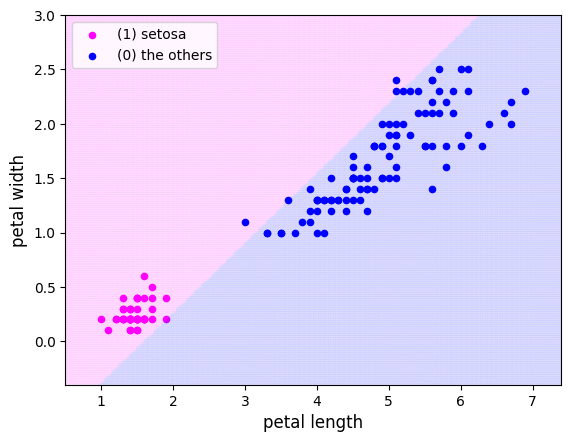

In [8]:
visualize(p, X_tr, y_tr,
          multi_class=False,
          class_id=labels,
          labels=[1, 0],
          colors=['magenta', 'blue'],
          xlabel='petal length',
          ylabel='petal width',
          legend_loc='upper left')